<a href="https://colab.research.google.com/github/AlexgideonS/TReND-Camina-course/blob/main/Session_1_Data_Access_solutions_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro the the Allen Brain Observatory Visual Coding Ophys Dataset.
This notebook demonstrates how to access and visualize data.

<a href="https://colab.research.google.com/github/AllenSWDB/TReND-CaMinA/blob/main/notebooks/Zambia25/07-to-10-Mon-toThu-AllenTutorial/Session_1_Data_Access_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !apt install s3fs
# !pip install allensdk
# !mkdir -p /data/allen-brain-observatory/
# !s3fs allen-brain-observatory /data/allen-brain-observatory/ -o public_bucket=1
# import os

# import time
# print("Runtime is now restarting...")
# print("You can ignore the error message [Your session crashed for an unknown reason.]")
# time.sleep(5)
# exit()

Standard Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Allen Brain Observatory set up
This instantiates the tools in the Allen SDK that allow us to access the Brain Observatory data.

The main entry point is the `BrainObservatoryCache` class. This class is responsible for accessing any data or metadata.

We begin by importing the `BrainObservatoryCache` class and instantiating it, pointing it to our manifest file.

`manifest_file` is a path to the where the manifest file is located. This needs to reflect where you are storing and accessing the data. Here, we are pointing it to the data on the S3 bucket.

In [ ]:
# standard data access code
import os
import sys
import platform
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

# Set file location based on platform.
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS
    data_root = "/Volumes/TReND2025/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "D:/"
elif ('amzn' in platstring) or ('google.colab' in sys.modules):
    # then on Code Ocean or Colab
    data_root = "/data/"
elif 'Linux' in platstring:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/TReND2025/"

# if running locally without external drive, set a local path to download data
# data_root = '/path/to/data'

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

### Querying from the Brain Observatory Cache

The Brain Observatory Cache enables us to see the dimensions of the dataset.

Let's take a look at the available depths, cre lines, areas, and stimuli available in the Brain Observatory datsset.



In [ ]:
###########
### The output is the 6 different visual areas of the mouse
# list of all targeted areas
boc.get_all_targeted_structures()

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

In [ ]:
###########

### List of transgenic mouse. Each with a particular gene being expressed
# list of all cre driver lines
boc.get_all_cre_lines()
len(boc.get_all_cre_lines())

13

In [ ]:
###########
# list of all imaging depths
### The different imaging layers of the
boc.get_all_imaging_depths()
len(boc.get_all_imaging_depths())

23

In [ ]:
###########

### The different stimuli that is showed to the different mice
# list of all stimuli
boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

### Finding Experiment containers in the Brain Observatory Cache
The `experiment container` describes a set of 3 `sessions` performed for the same field of view (ie. same targeted area and imaging depth in the same mouse that targets the same set of neurons). Each experiment container has a unique ID number.

!['Diagram of containers'](http://alleninstitute.github.io/AllenSDK/_static/container_session_layout.png)

First let's try to find all the experiment containers:

In [ ]:
########

### This are the different experimental containers
all_exps = boc.get_experiment_containers()
len(all_exps)

456

And now let's find all the "sessions" (These are Ophys Experiment Sessions):

In [ ]:
#########

### Thesee are the different sessions in each of the experimental containers
all_sessions = boc.get_ophys_experiments()
len(all_sessions)

1368

#### Finding Experiment Containers of Interest

We may be interested in a specific visual area and Cre line. Let's choose a visual area and Cre line from the lists above.

In [ ]:
visual_area = 'VISal'
cre_line ='Cux2-CreERT2'

Get the list of all the experiment containers for that area and Cre line combination.

In [ ]:
? boc.get_experiment_containers

Signature:
 boc.get_experiment_containers(
    file_name=None,
    ids=None,
    targeted_structures=None,
    imaging_depths=None,
    cre_lines=None,
    reporter_lines=None,
    transgenic_lines=None,
    include_failed=False,
    simple=True,
)
Docstring:
Get a list of experiment containers matching certain criteria.

Parameters
----------
file_name: string
    File name to save/read the experiment containers.  If file_name
    is None,
    the file_name will be pulled out of the manifest.  If caching
    is disabled, no file will be saved. Default is None.

ids: list
    List of experiment container ids.

targeted_structures: list
    List of structure acronyms.  Must be in the list returned by
    BrainObservatoryCache.get_all_targeted_structures().

imaging_depths: list
    List of imaging depths.  Must be in the list returned by
    BrainObservatoryCache.get_all_imaging_depths().

cre_lines: list
    List of cre lines.  Must be in the list returned by
    BrainObservatoryCache.

In [ ]:
###############
### For this chosen mouse, and the region we are focusing on, the output is the result of the different imaging depth
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines = [cre_line])
exps

[{'id': 511854338,
  'imaging_depth': 275,
  'targeted_structure': 'VISal',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'donor_name': '233215',
  'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-233215',
  'tags': [],
  'failed': False},
 {'id': 698102441,
  'imaging_depth': 276,
  'targeted_structure': 'VISal',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'donor_name': '339323',
  'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-339323',
  'tags': [],
  'failed': False},
 {'id': 511510715,
  'imaging_depth': 175,
  'targeted_structure': 'VISal',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'donor_name': '222426',
  'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
  'tags': [],
  'failed': False},
 {'id': 638056632,
  'imaging_depth': 275,
  'targeted_structure': 'VISal',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'donor_name': '339323',
  'specimen_name': 'Cux2-CreERT2

A nice way to look at it is by using a pandas dataframe:

In [ ]:
pd.DataFrame(exps)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,511854338,275,VISal,Cux2-CreERT2,Ai93(TITL-GCaMP6f),233215,Cux2-CreERT2;Camk2a-tTA;Ai93-233215,[],False
1,698102441,276,VISal,Cux2-CreERT2,Ai93(TITL-GCaMP6f),339323,Cux2-CreERT2;Camk2a-tTA;Ai93-339323,[],False
2,511510715,175,VISal,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],False
3,638056632,275,VISal,Cux2-CreERT2,Ai93(TITL-GCaMP6f),339323,Cux2-CreERT2;Camk2a-tTA;Ai93-339323,[],False
4,511510867,275,VISal,Cux2-CreERT2,Ai93(TITL-GCaMP6f),228379,Cux2-CreERT2;Camk2a-tTA;Ai93-228379,[],False
5,511510998,175,VISal,Cux2-CreERT2,Ai93(TITL-GCaMP6f),229105,Cux2-CreERT2;Camk2a-tTA;Ai93-229105,[Epileptiform Events],False
6,511510664,175,VISal,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222420,Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],False
7,511510797,175,VISal,Cux2-CreERT2,Ai93(TITL-GCaMP6f),225036,Cux2-CreERT2;Camk2a-tTA;Ai93-225036,[],False
8,511510695,175,VISal,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222425,Cux2-CreERT2;Camk2a-tTA;Ai93-222425,[],False
9,511511052,275,VISal,Cux2-CreERT2,Ai93(TITL-GCaMP6f),228378,Cux2-CreERT2;Camk2a-tTA;Ai93-228378,[],False


How many experiment containers did you find?

In [ ]:
len(exps)

13

Try this: Let's look at one experiment container, imaged from Cux2-CreERT2, in VISp, from imaging depth 175 um. Compute the dataframe that will show you all the experiment containers for this combination of parameters.

In [ ]:
##################
exps = boc.get_experiment_containers(targeted_structures=["VISp"], cre_lines = ["Cux2-CreERT2"], imaging_depths = [175])
pd.DataFrame(exps)


,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,511510736,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],False
1,511510855,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),229106,Cux2-CreERT2;Camk2a-tTA;Ai93-229106,[],False
2,511509529,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222420,Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],False
3,511507650,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222424,Cux2-CreERT2;Camk2a-tTA;Ai93-222424,[],False
4,511510650,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222425,Cux2-CreERT2;Camk2a-tTA;Ai93-222425,[],False
5,511510670,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),225037,Cux2-CreERT2;Camk2a-tTA;Ai93-225037,[],False
6,701412138,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),382421,Cux2-CreERT2;Camk2a-tTA;Ai93-382421,[],False
7,511510718,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),231584,Cux2-CreERT2;Camk2a-tTA;Ai93-231584,[],False


Now let's look at one of these experiment containers:

In [ ]:
experiment_container_id = 511510736

Let's get all of the sessions for this container.

In [ ]:
?boc.get_ophys_experiments

Signature:
boc.get_ophys_experiments(
    file_name=None,
    ids=None,
    experiment_container_ids=None,
    targeted_structures=None,
    imaging_depths=None,
    cre_lines=None,
    reporter_lines=None,
    transgenic_lines=None,
    stimuli=None,
    session_types=None,
    cell_specimen_ids=None,
    include_failed=False,
    require_eye_tracking=False,
    simple=True,
)
Docstring:
Get a list of ophys experiments matching certain criteria.

Parameters
----------
file_name: string
    File name to save/read the ophys experiments.  If file_name
    is None,
    the file_name will be pulled out of the manifest.  If caching
    is disabled, no file will be saved. Default is None.

ids: list
    List of ophys experiment ids.

experiment_container_ids: list
    List of experiment container ids.

targeted_structures: list
    List of structure acronyms.  Must be in the list returned by
    BrainObservatoryCache.get_all_targeted_structures().

imaging_depths: list
    List of imaging de

In [ ]:
#############

pd.DataFrame(boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id]))

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,501704220,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),104,511510736,three_session_A,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True
1,501559087,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),103,511510736,three_session_B,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True
2,501474098,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),102,511510736,three_session_C,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True


Let's find the session from this container that used the `natural_scenes` stimulus.

In [ ]:
#############

t_frame = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['natural_scenes'])

pd.DataFrame(t_frame)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,501559087,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),103,511510736,three_session_B,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True


Each session has a unique ID, and we can use that ID to access the data for this session.

In [ ]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id],
                                       stimuli=['natural_scenes'])[0]['id']
print(session_id)

501559087


This concludes the section on querying the brain observatory cache for searching for experiments. We will now look into how we can find information about specific Sessions (Ophys Experiments)

# Ophys Experiment data
A single imaging session is stored in an NWB File. This section shows us how to access everything in the NWB file for a single imaging session. An ophys session contains the following:


1.   Maximum Projection of the Ophys Session
2.   ROI masks for cells
3.   DF/F Traces
4.   Stimulus Epochs
5.   Running Speed
6.   Stimulus Table
7.   Stimulus Template



In [ ]:
?boc.get_ophys_experiment_data

Signature: boc.get_ophys_experiment_data(ophys_experiment_id, file_name=None)
Docstring:
Download the NWB file for an ophys_experiment (if it hasn't
already been
downloaded) and return a data accessor object.

Parameters
----------
file_name: string
    File name to save/read the data set.  If file_name is None,
    the file_name will be pulled out of the manifest.  If caching
    is disabled, no file will be saved. Default is None.

ophys_experiment_id: integer
    id of the ophys_experiment to retrieve

Returns
-------
BrainObservatoryNwbDataSet
File:      ~/opt/anaconda3/envs/swdb2024_arm/lib/python3.9/site-packages/allensdk/core/brain_observatory_cache.py
Type:      method

In [ ]:
#######
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)
data_set

We can use this `data_set` object to access all the pieces of data for the session. Let's take a look.

# Maximum projection
This is the projection of the full motion corrected movie. It shows all of the neurons imaged during the session.

In [ ]:
###########
max_projection = data_set.get_max_projection()
print(max_projection.shape)

(512, 512)


In [ ]:
max_projection

array([[ 296,  308,  306, ..., 2760, 2164,  888],
       [ 312,  298,  303, ..., 2741, 1716, 1031],
       [ 278,  295,  298, ..., 1426,  929,  574],
       ...,
       [ 347,  348,  366, ...,  407,  403,  410],
       [ 335,  357,  398, ...,  317,  354,  362],
       [ 308,  288,  306, ...,  293,  316,  318]], dtype=uint16)

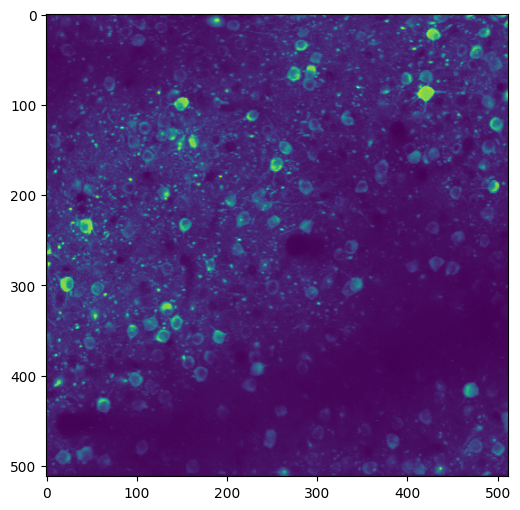

In [ ]:


fig = plt.figure(figsize=(6,6))
plt.imshow(max_projection)

# ROI Masks
These are all of the segmented masks for cell bodies in this experiment.

In [ ]:
#########

### ROI stands for Region of Interest
rois = data_set.get_roi_mask_array()
print(rois.shape)

(174, 512, 512)


Look at the dimensions of the mask. There is one image per cell.

In [ ]:
print(rois.shape)
print("Number of cells:", rois.shape[0])

(174, 512, 512)
Number of cells: 174


What are the values in the mask?

In [ ]:
################
np.unique(rois)

array([0, 1], dtype=uint8)

Let's look at a mask for one cell:

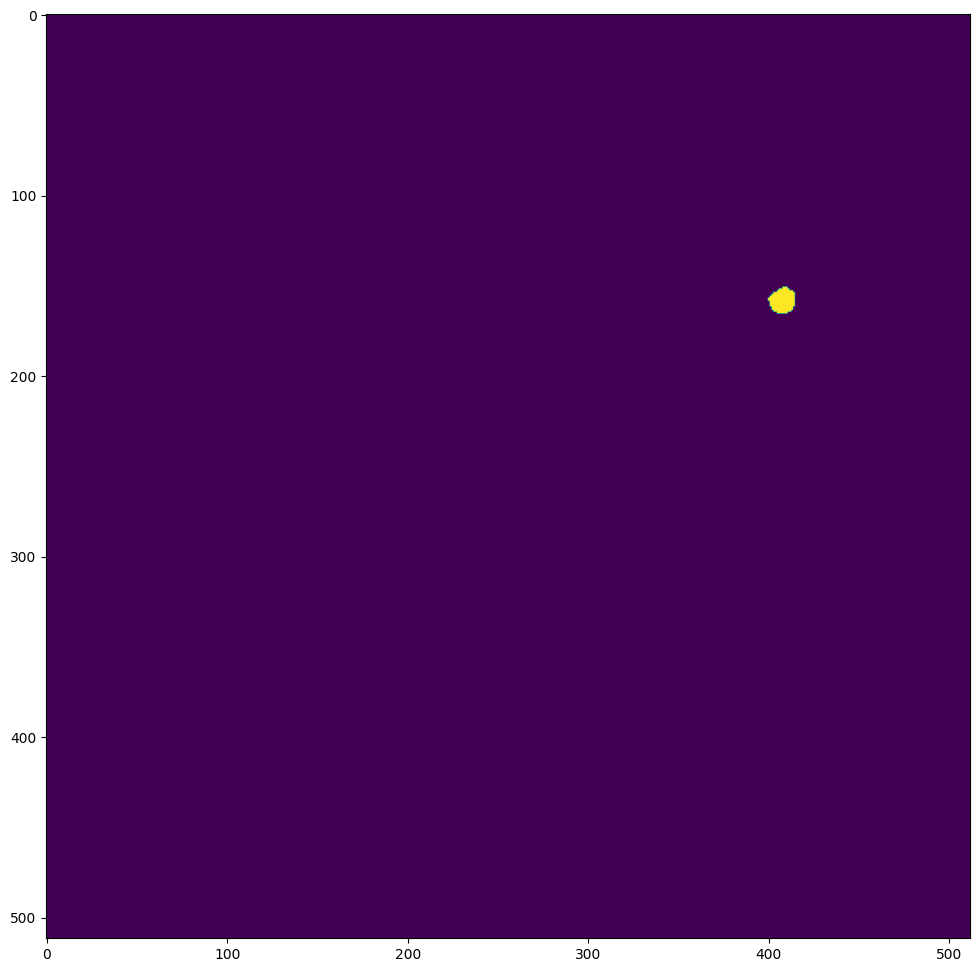

In [ ]:
################
plt.figure(figsize=(12,12))
plt.imshow(rois[9])


To look at all cells, instead we can sum them up:

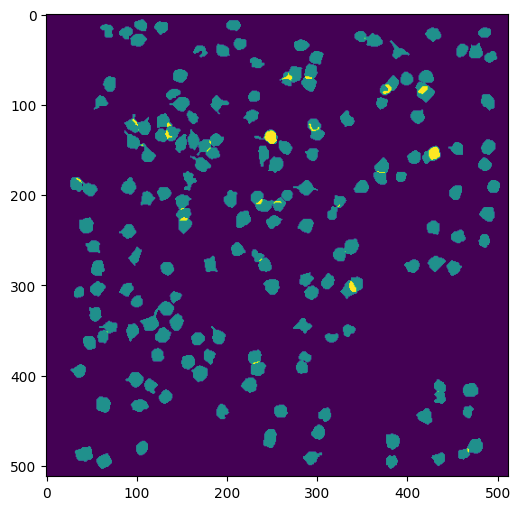

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(rois.sum(axis=0))

In [ ]:
np.unique(rois.sum(axis=0))

array([0, 1, 2], dtype=uint64)

# DF/F Traces
There are a number of accessible traces for all these 174 cells in the NWB file, including raw fluorescence, neuropil corrected traces, demixed traces, and DF/F traces. There are also extracted events available.
In this tutorial we will us DF/F to examine neural activity.

In [ ]:
##############
ts, dff = data_set.get_dff_traces()

In [ ]:
ts.shape

(113888,)

Let's look at dff and ts

In [ ]:
##############
dff.shape

(174, 113888)

In [ ]:
dff[0].shape

(113888,)

In [ ]:
#############
ts[:10]

array([26.71893, 26.75218, 26.78542, 26.81867, 26.85191, 26.88516,
       26.91841, 26.95165, 26.9849 , 27.01815])

Let's plot the activity of one neuron:

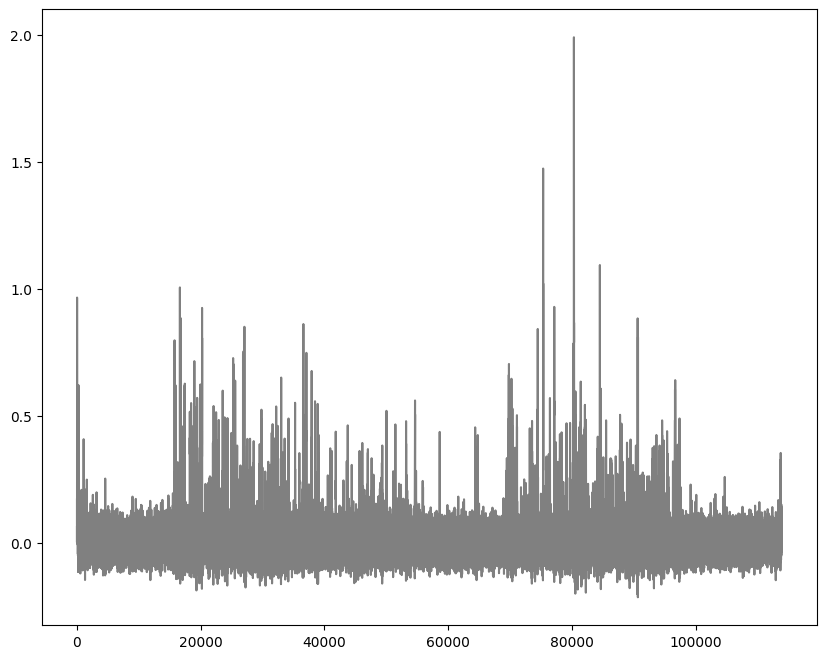

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(dff[10,:], color='gray')

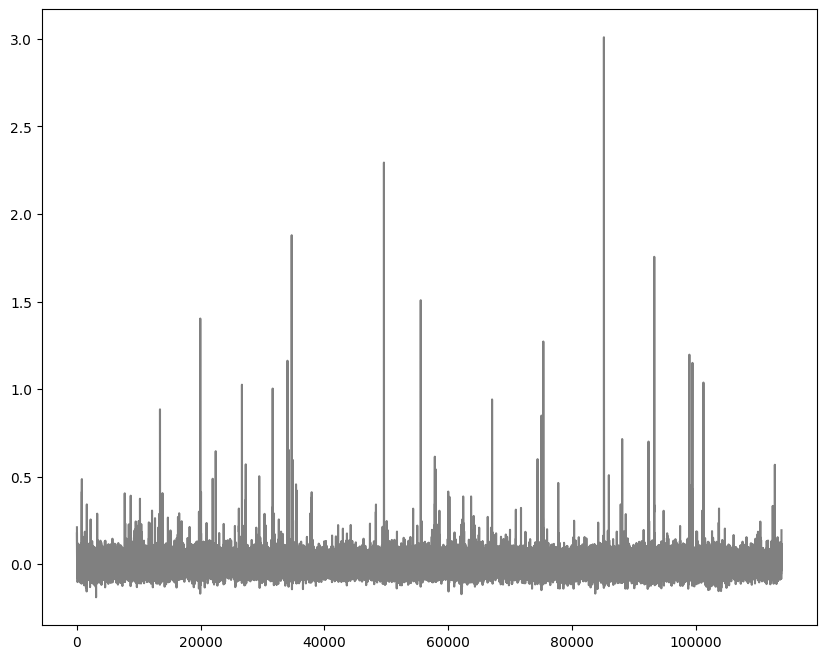

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(dff[15,:], color='gray')

Let's plot the activity of the first 50 neurons from this session.

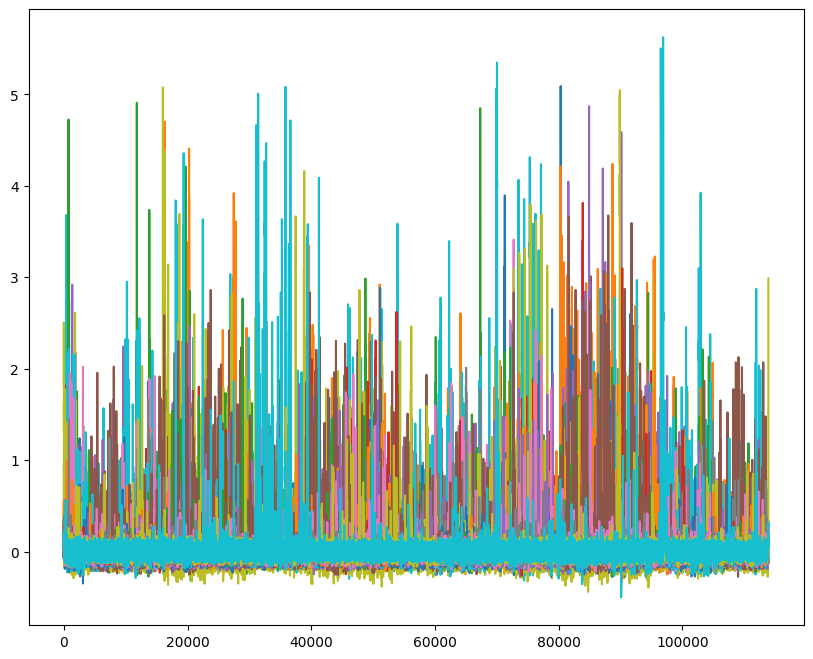

In [ ]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:])
    #plt.plot(dff[i,:]+(i*2), color='gray')

# Stimulus epochs
Several stimuli are shown during each imaging session, interleaved with each other. The stimulus epoch table provides information of these interleaved stimulus epochs

In [ ]:
############
stim_epoch = data_set.get_stimulus_epoch_table()
stim_epoch

,stimulus,start,end
0,static_gratings,747,15196
1,natural_scenes,16100,30551
2,spontaneous,30701,39581
3,natural_scenes,39582,54050
4,static_gratings,54953,69403
5,natural_movie_one,70307,79338
6,natural_scenes,80241,96126
7,static_gratings,97406,113662


Let's add the stimulus epoch information to the plot of neural activity.

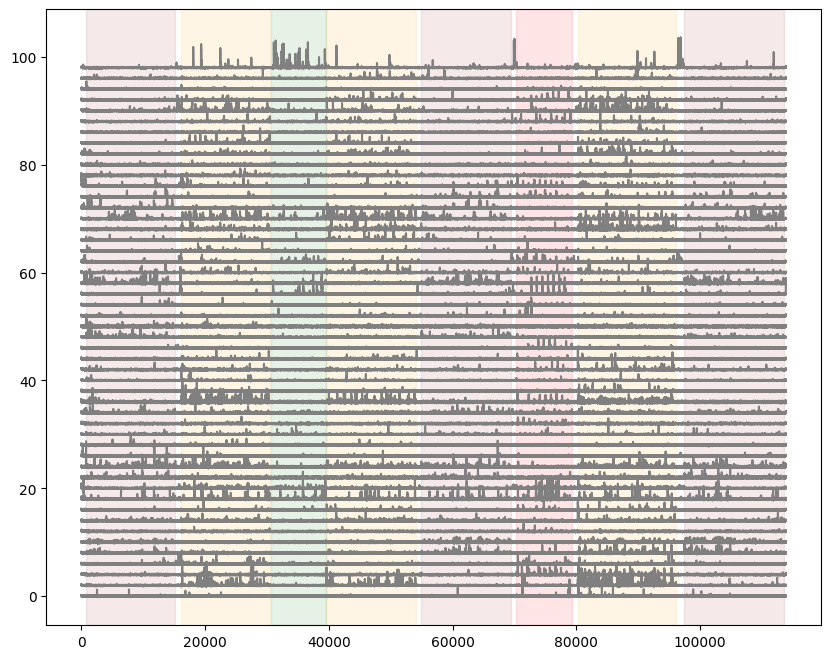

In [ ]:
#plot activity of first 50 neurons
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')

#for each stimulus, shade the plot when the stimulus is presented
colors = ['brown','orange','green','red','blue','black','navyblue','skyblue']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)


# Running speed
The running speed of the animal on the rotating disk during the entire session.

Text(0, 0.5, 'Running speed (cm/s)')

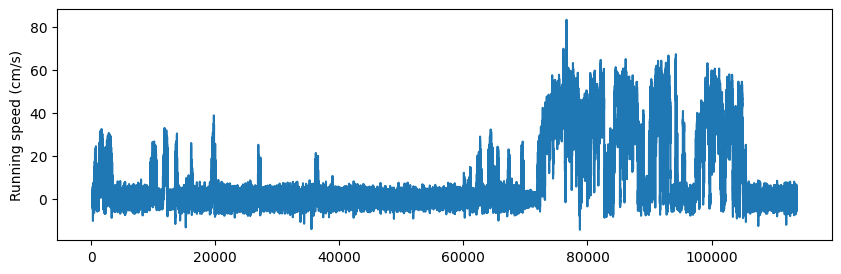

In [ ]:
dxcm, tsd = data_set.get_running_speed()

fig = plt.figure(figsize=(10,3))
plt.plot(dxcm)
plt.ylabel("Running speed (cm/s)")

Let's add the running speed to our plot of neural activity and stimulus epochs.

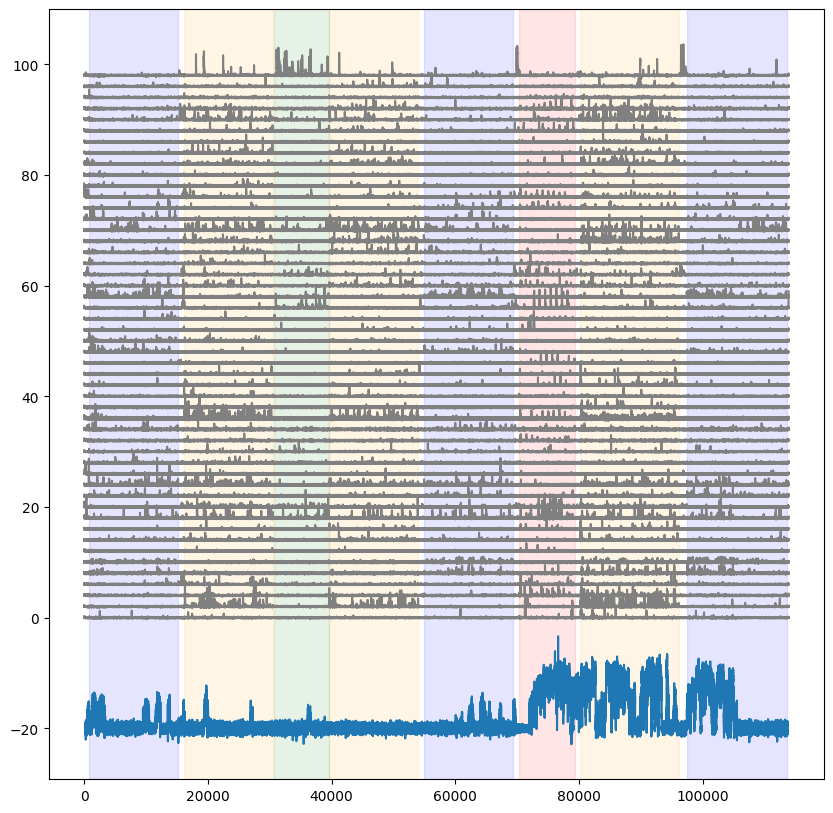

In [ ]:
#plot activity of first 50 neurons
fig = plt.figure(figsize=(10,10))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')

#plot the running speed (scaled and offset to fit)
plt.plot((0.2*dxcm)-20)

#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)


Let's look at a few individual neurons.

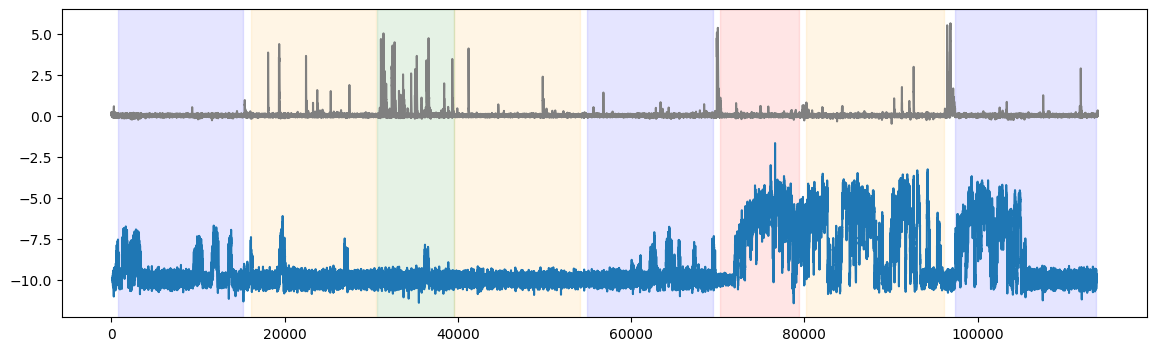

In [ ]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[49,:], color='gray')
plt.plot((0.1*dxcm)-10)

#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)


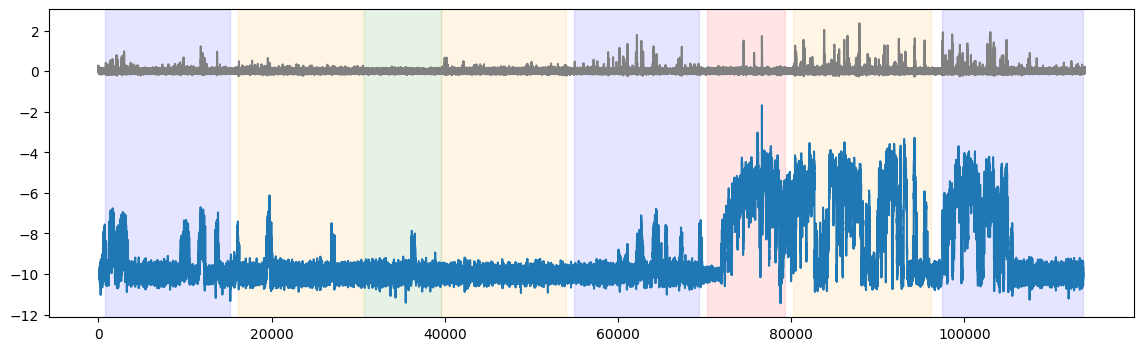

In [ ]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[4,:], color='gray')
plt.plot((0.1*dxcm)-10)

#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

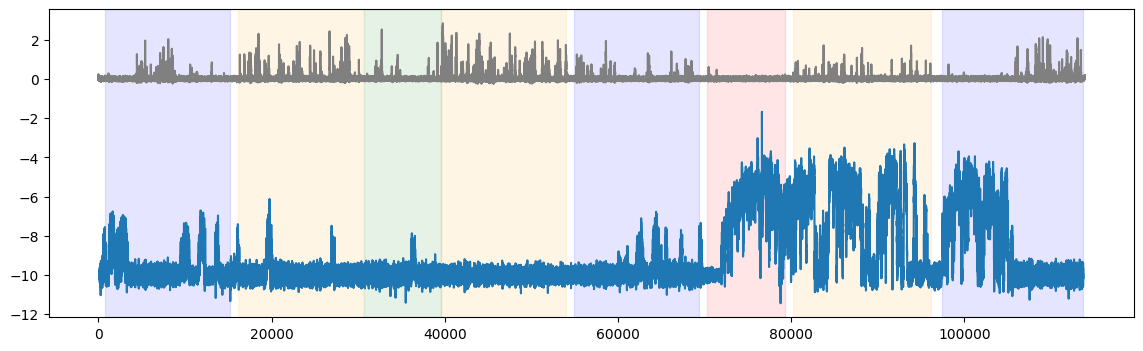

In [ ]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[35,:], color='gray')
plt.plot((0.1*dxcm)-10)

#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

# Stimulus Table
For each stimulus there is a stimulus table with information about the condition and timing of each trial.

In [ ]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')
natural_scene_table.head(n=10)


,frame,start,end
0,81,16100,16107
1,33,16108,16115
2,76,16115,16122
3,13,16123,16130
4,56,16130,16137
5,30,16138,16145
6,44,16145,16152
7,93,16153,16160
8,65,16160,16167
9,60,16168,16175


# Stimulus Template
The images and movies presented during the session area also included in the NWB file as the stimulus template. Stimuli that are generated programmatically (eg. drifting and static gratings) do not have a stimulus template. There are tools in the SDK to recreate these stimuli.

In [ ]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

In [ ]:
natural_scene_template.shape

(118, 918, 1174)

Let's look at the scene presented in the first trial.

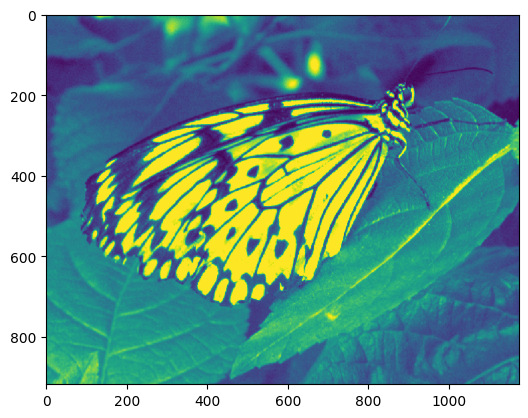

In [ ]:
scene_number = natural_scene_table.frame.loc[81]
plt.imshow(natural_scene_template[scene_number,:,:])

We can add the trials of this image to the plot of neural activity too:

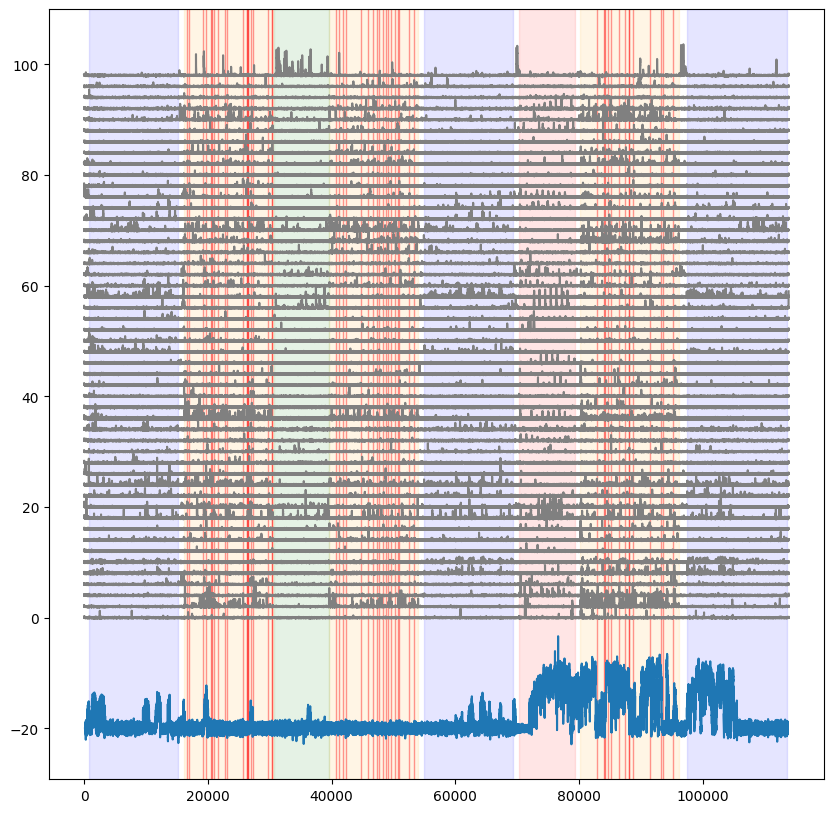

In [ ]:
#plot activity of first 50 neurons
fig = plt.figure(figsize=(10,10))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')

#plot the running speed (scaled and offset to fit)
plt.plot((0.2*dxcm)-20)

#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

We can zoom in on these trials. We'll look at one neuron's responses to all the trials of one image.

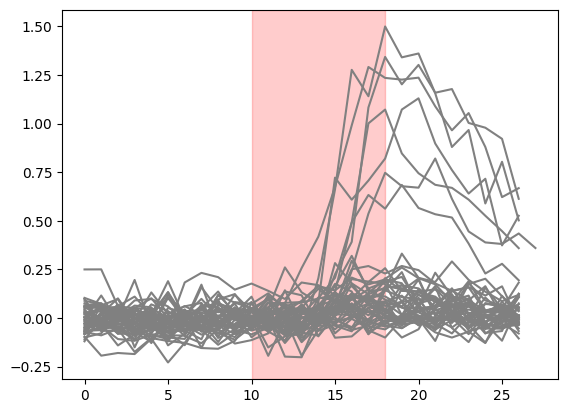

In [ ]:
cell_index=19
scene_number=22

stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]

for i in range(len(stim_subset)):
    plt.plot(dff[cell_index,stim_subset.start.iloc[i]-10:stim_subset.end.iloc[i]+10], color='gray')
plt.axvspan(10,18, color='red',alpha=0.2)


#### Specimen IDs

Each cell in the dataset has a unique ID, called the "Specimen ID". Let us find the cell specimen IDS for the cells in this session.


In [ ]:
data_set.get_cell_specimen_ids()

array([517473350, 517473341, 517473313, 517473255, 517471959, 517471769,
       517473059, 517471997, 517472716, 517471919, 517472989, 517472293,
       517473115, 517472454, 517473020, 517472734, 517474366, 587377483,
       517471708, 587377366, 587377223, 517474444, 517474437, 517473105,
       517472300, 517472326, 517472708, 517472215, 517472712, 517472360,
       517472399, 517472197, 517472582, 517472190, 517473926, 587377518,
       517471931, 517472637, 517472416, 517471658, 517472724, 517472684,
       517471664, 587377211, 517473947, 587377064, 517472063, 587377621,
       517473080, 517472553, 517473001, 517474078, 517471794, 517471674,
       517473916, 517471803, 517472592, 517473014, 517474459, 517472241,
       517472720, 517472534, 517472054, 587377662, 517474012, 517474020,
       517473653, 517472007, 517472645, 517472211, 517472677, 517472731,
       517472621, 517472442, 587377204, 517473027, 517472818, 517473304,
       517474121, 517473034, 517472909, 517473624, 

Why is this useful? The cell specimen IDS can help us specify which cells we would like to analyze in any of the traces. Each cell specifmen ID is associated with an "index" of the trace arrays. For example, the first cell above : 517473350 is associated with index "0". You can get this information by using the following command: (Note that this takes a list and outputs a list)


In [ ]:
indices = data_set.get_cell_specimen_indices(cell_specimen_ids = [517474415])

This means that to find the trace of this cell in the dff array, we would use the index of the cell specimen like this:

In [ ]:
dff_trace = dff[indices[0]]

##Exercises

1. Print the metadata for the dataset above. Discuss what all the information means (we have covered many of them above!)

In [ ]:
data_set.get_metadata()

{'sex': 'male',
 'targeted_structure': 'VISp',
 'ophys_experiment_id': 501559087,
 'experiment_container_id': 511510736,
 'excitation_lambda': '910 nanometers',
 'indicator': 'GCaMP6f',
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)',
 'session_start_time': datetime.datetime(2016, 2, 4, 10, 25, 24),
 'session_type': 'three_session_B',
 'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
 'cre_line': 'Cux2-CreERT2/wt',
 'imaging_depth_um': 175,
 'age_days': 104,
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.2',
 'pipeline_version': '3.0'}

2. What is the session type for the dataset above? Find the other two sessions in the same experiment container.

In [ ]:
data_set.get_metadata()['experiment_container_id']

511510736

In [ ]:
sessions = boc.get_ophys_experiments(experiment_container_ids=[data_set.get_metadata()['experiment_container_id']])
pd.DataFrame(sessions)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,501704220,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),104,511510736,three_session_A,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True
1,501559087,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),103,511510736,three_session_B,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True
2,501474098,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),102,511510736,three_session_C,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True


3. For each session, a cell id is associated with an index. This index maps into the dff of event traces. Pick one cell id from the list above and find the index for that cell. Look for the cell specimen indices and plot the dff trace for this cell.

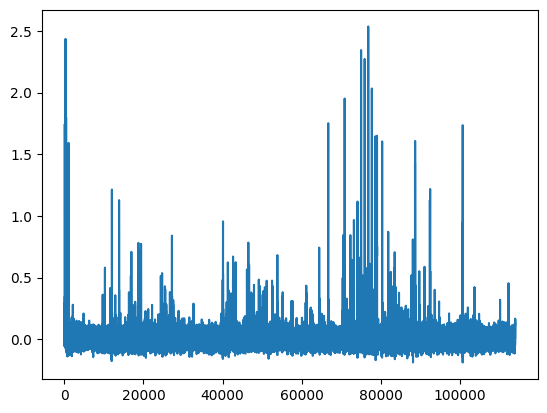

In [ ]:
indices = data_set.get_cell_specimen_indices(cell_specimen_ids = [517474415])
plt.plot(dff[indices[0],:])

4. Now find all sessions where this cell (specimen) appears and show us what type of session each was.

In [ ]:
sessions = boc.get_ophys_experiments(cell_specimen_ids=[517474415])
pd.DataFrame(sessions)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,501704220,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),104,511510736,three_session_A,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True
1,501559087,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),103,511510736,three_session_B,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True
2,501474098,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),102,511510736,three_session_C,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True


5. Of all the Cre-lines, which ones do we have the most number or experiments for?

In [ ]:
for creline in boc.get_all_cre_lines():
  print(creline, " ", len(boc.get_experiment_containers(cre_lines=[creline])))

Cux2-CreERT2   76
Emx1-IRES-Cre   41
Fezf2-CreER   9
Nr5a1-Cre   39
Ntsr1-Cre_GN220   18
Pvalb-IRES-Cre   21
Rbp4-Cre_KL100   38
Rorb-IRES2-Cre   40
Scnn1a-Tg3-Cre   9
Slc17a7-IRES2-Cre   57
Sst-IRES-Cre   49
Tlx3-Cre_PL56   9
Vip-IRES-Cre   50


6. Find a dataset in which we have eye tracking data (pupil size). Plot this.

In [ ]:
?boc.get_ophys_experiments

Signature:
boc.get_ophys_experiments(
    file_name=None,
    ids=None,
    experiment_container_ids=None,
    targeted_structures=None,
    imaging_depths=None,
    cre_lines=None,
    reporter_lines=None,
    transgenic_lines=None,
    stimuli=None,
    session_types=None,
    cell_specimen_ids=None,
    include_failed=False,
    require_eye_tracking=False,
    simple=True,
)
Docstring:
Get a list of ophys experiments matching certain criteria.

Parameters
----------
file_name: string
    File name to save/read the ophys experiments.  If file_name
    is None,
    the file_name will be pulled out of the manifest.  If caching
    is disabled, no file will be saved. Default is None.

ids: list
    List of ophys experiment ids.

experiment_container_ids: list
    List of experiment container ids.

targeted_structures: list
    List of structure acronyms.  Must be in the list returned by
    BrainObservatoryCache.get_all_targeted_structures().

imaging_depths: list
    List of imaging de

In [ ]:
expts = boc.get_ophys_experiments(require_eye_tracking=True)
pd.DataFrame(expts)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,577225417,275,VISl,Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),105,575772104,three_session_C2,296710,Vip-IRES-Cre;Ai148-296710,False
1,510390912,275,VISal,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),80,511500480,three_session_A,232623,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-232623,False
2,645474010,375,VISl,Rbp4-Cre_KL100,Ai93(TITL-GCaMP6f),112,643590699,three_session_B,344122,Rbp4-Cre_KL100;Camk2a-tTA;Ai93-344122,False
3,673145838,275,VISl,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),109,672207945,three_session_B,369311,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-369311,False
4,704298735,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),111,701412138,three_session_A,382421,Cux2-CreERT2;Camk2a-tTA;Ai93-382421,False
...,...,...,...,...,...,...,...,...,...,...,...
832,577820172,275,VISam,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),110,576411244,three_session_B,295995,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-295995,False
833,648389302,275,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),108,647155120,three_session_B,347751,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-347751,False
834,510517609,375,VISpm,Rbp4-Cre_KL100,Ai93(TITL-GCaMP6f),75,511511006,three_session_B,233442,Rbp4-Cre;Camk2a-tTA;Ai93-233442,False
835,547560448,350,VISal,Nr5a1-Cre,Ai93(TITL-GCaMP6f),107,546328009,three_session_C2,261969,Nr5a1-Cre;Camk2a-tTA;Ai93-261969,False


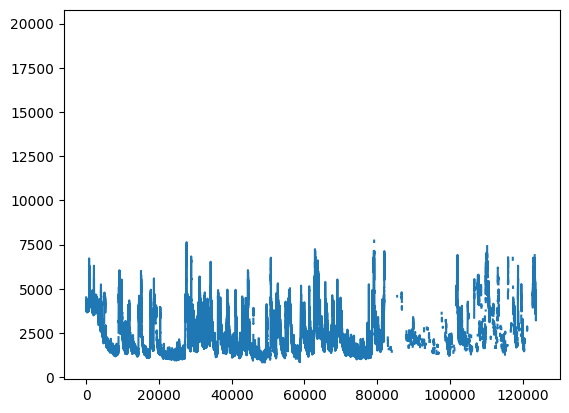

In [ ]:
data_set1 = boc.get_ophys_experiment_data(ophys_experiment_id=expts[0]['id'])
ts1, ps = data_set1.get_pupil_size()
plt.plot(ps)